# NN Prediction of Telco Client Churn

In [1]:
import sys
sys.path.append("..")
import numpy as np
import pandas as pd
from multilayer_perceptron import MultiLayerNN
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Data Prep

In [2]:
X_train = np.loadtxt("data-churn/x_train.csv")
y_train = np.loadtxt("data-churn/y_train.csv")
X_test = np.loadtxt("data-churn/x_test.csv")
y_test = np.loadtxt("data-churn/y_test.csv")

## Normalization

In [3]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
norm_X_train = scaler.transform(X_train)
norm_X_test = scaler.transform(X_test)

## Reshaping

In [5]:
norm_X_train = norm_X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
norm_X_test = norm_X_test.T
y_test = y_test.reshape(1, y_test.shape[0])

In [6]:
print(norm_X_train.shape)
print(y_train.shape)
print(norm_X_test.shape)
print(y_test.shape)

(39, 4930)
(1, 4930)
(39, 2113)
(1, 2113)


# Binary Neural Network

In [7]:
churn_nn = MultiLayerNN(norm_X_train, y_train)

Cost after epoch 0: 0.518559
Learning rate after epoch 0: 0.001500
Cost after epoch 1000: 0.285891
Learning rate after epoch 1000: 0.001409
Cost after epoch 2000: 0.267753
Learning rate after epoch 2000: 0.001168
Cost after epoch 3000: 0.262353
Learning rate after epoch 3000: 0.000855
Cost after epoch 4000: 0.256442
Learning rate after epoch 4000: 0.000552
Cost after epoch 5000: 0.252635
Learning rate after epoch 5000: 0.000315
Cost after epoch 6000: 0.251324
Learning rate after epoch 6000: 0.000158
Cost after epoch 7000: 0.249851
Learning rate after epoch 7000: 0.000070


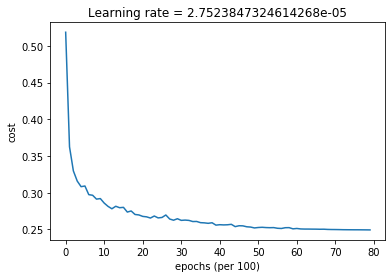

In [8]:
churn_nn.fit_binary(layer_dimensions = [norm_X_train.shape[0], 20, 10, 5, 1],
                    optimizer = "adam",
                    learning_rate = 0.0015,
                    learning_decay_rate = 1.25e-7,
                    minibatched = True,
                    minibatch_size = 256,
                    num_epochs = 8000)

## Training Performance

In [10]:
pred_train = churn_nn.predict_binary(norm_X_train, y_train)

Accuracy: 0.8860040567951317


In [11]:
print("Precision:", precision_score(y_train[0], pred_train[0]))
print("Recall:", recall_score(y_train[0], pred_train[0]))

Precision: 0.7986960065199674
Recall: 0.7567567567567568


In [12]:
tn, fp, fn, tp = confusion_matrix(y_train[0], pred_train[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.687221,0.050101
label: 1,0.063895,0.198783


## Test Performance

In [13]:
pred_test = churn_nn.predict_binary(norm_X_test, y_test)

Accuracy: 0.7439659252247989


In [14]:
print("Precision:", precision_score(y_test[0], pred_test[0]))
print("Recall:", recall_score(y_test[0], pred_test[0]))

Precision: 0.5308411214953271
Recall: 0.49477351916376305


In [15]:
tn, fp, fn, tp = confusion_matrix(y_test[0], pred_test[0], normalize = "all").ravel()
pd.DataFrame([[tn, fp], [fn, tp]], index = ["label: 0", "label: 1"], columns = ["predicted: 0", "predicted: 1"])

,predicted: 0,predicted: 1
label: 0,0.609560,0.118788
label: 1,0.137246,0.134406


In [16]:
# pred_train = np.where(A4 > 0.5, 1, 0)
# accuracy_score(cat_y_train[0], pred_train[0])